# This script contains the following:
## 1. Import libraries and data
## 2. Set theme
## 3. Top 20 start stations
## 4. Dual-axis plot
## 5. Box plot
## 6. Facetgrid

### 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib as mpl

print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", mpl.__version__)


pandas: 1.5.1
seaborn: 0.12.1
matplotlib: 3.7.1


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt


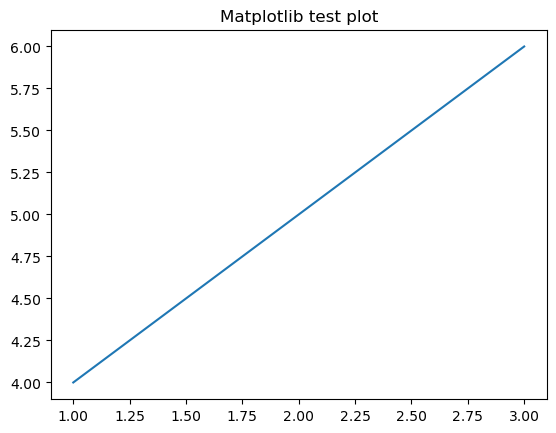

In [4]:
# Test
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Matplotlib test plot")
plt.show()

I will import my slimmed down data as my fully merged dataset is 5.9 GB but the slimmed down version is 3GB and conatins all the columns I need for the project.

In [5]:
# Import data 
df_slim = pd.read_csv('merged_citibike_weather_2022_slim.csv')



In [6]:
# Check import
df_slim.head()

,ride_id,started_at,ended_at,start_station_name,member_casual,date,avg_temp
0,9D0DC440CB40CF8E,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,casual,2022-08-27,27.8
1,2214991DFBE5C4D7,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,casual,2022-08-20,27.9
2,20C5D469563B6337,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,member,2022-08-31,25.6
3,3E8791885BC189D1,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,member,2022-08-02,26.4
4,8DBCBF98885106CB,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,member,2022-08-25,28.1


In [7]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29838166 entries, 0 to 29838165
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   started_at          object 
 2   ended_at            object 
 3   start_station_name  object 
 4   member_casual       object 
 5   date                object 
 6   avg_temp            float64
dtypes: float64(1), object(6)
memory usage: 1.6+ GB


Date was an object so i need to confirm or change it to datetime so it is recognisable. 

In [8]:
# Confirm datetime format
df_slim['date'] = pd.to_datetime(df_slim['date'])


In [9]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29838166 entries, 0 to 29838165
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   started_at          object        
 2   ended_at            object        
 3   start_station_name  object        
 4   member_casual       object        
 5   date                datetime64[ns]
 6   avg_temp            float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.6+ GB


### 3. Set theme

In [10]:
# Choose a theme and colour palette for all plots
sns.set_theme(style="whitegrid", palette="viridis")

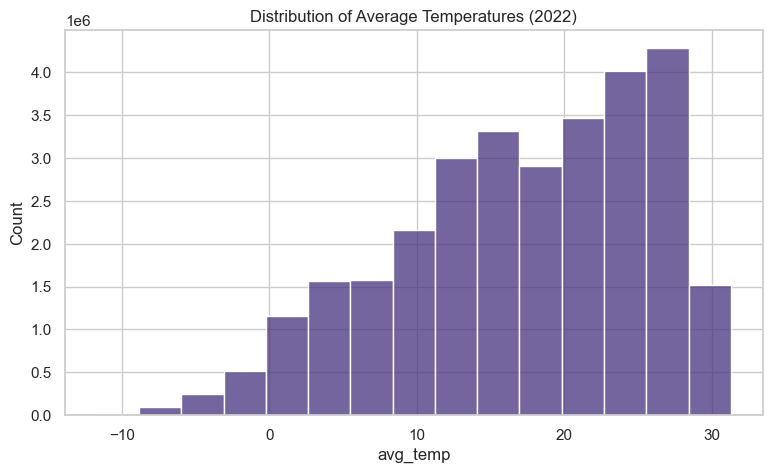

In [11]:
plt.figure(figsize=(9,5))
sns.histplot(df_slim['avg_temp'], bins=15)
plt.title('Distribution of Average Temperatures (2022)')
plt.savefig('avg_temp_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 3. Top 20 start stations

In [12]:
# Top 20 starting stations by trip count
top20 = df_slim['start_station_name'].value_counts().head(20)

In [13]:
# Display as a dataframe
top20_df = top20.reset_index()
top20_df.columns = ['start_station_name', 'trip_count']

In [14]:
# Check dataframe
top20_df

,start_station_name,trip_count
0,W 21 St & 6 Ave,129016
1,West St & Chambers St,123289
2,Broadway & W 58 St,114293
3,6 Ave & W 33 St,106440
4,1 Ave & E 68 St,104856
5,Broadway & E 14 St,98862
6,Broadway & W 25 St,98422
7,University Pl & E 14 St,97120
8,Broadway & E 21 St,95691
9,W 31 St & 7 Ave,94208


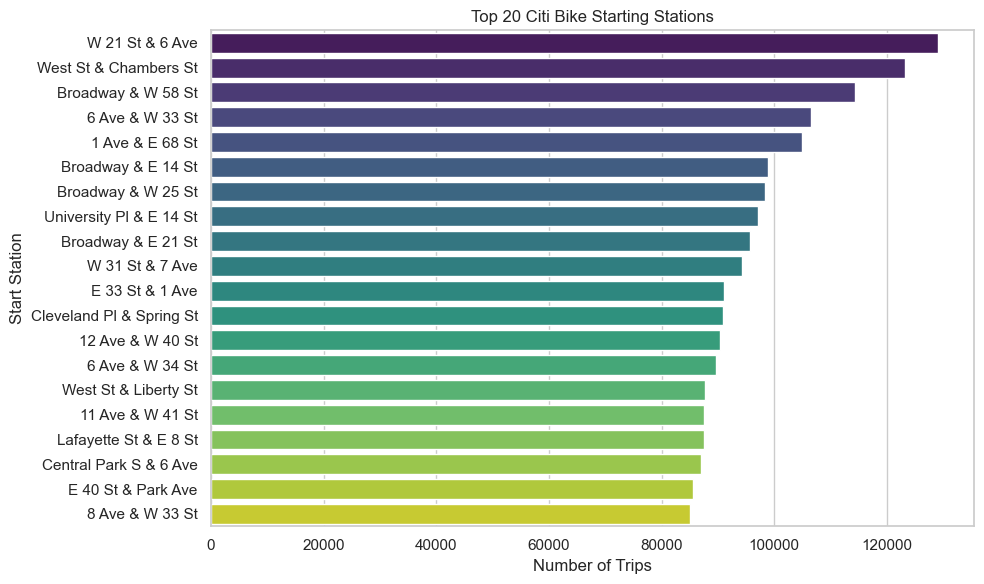

In [15]:
# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top20_df,
    y='start_station_name',
    x='trip_count',
    palette='viridis'
)
plt.title('Top 20 Citi Bike Starting Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')
plt.tight_layout()
plt.show()

Although 'viridis' is a great palette to use as it is colour blind friendly. for this bar chart I will override it and try another palette to help to show stations more distinctly.

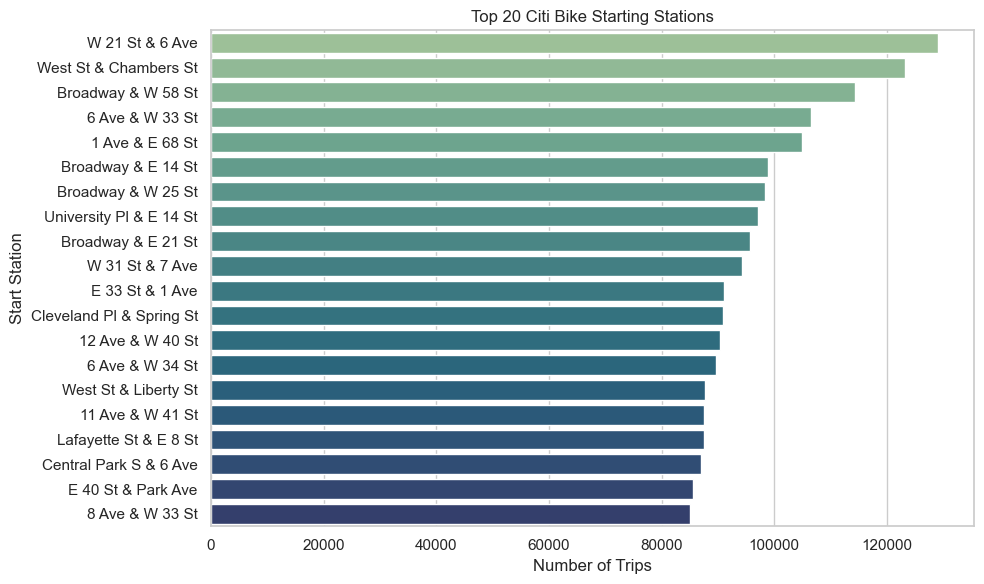

In [16]:
# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top20_df,
    y='start_station_name',
    x='trip_count',
    palette='crest'
)
plt.title('Top 20 Citi Bike Starting Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')
plt.tight_layout()
plt.savefig('top20_stations.png', dpi=300, bbox_inches='tight')
plt.show()

### 4. Dual-axis plot

In [17]:
# Import data I used in previous task 2.3
df_trips_temp = pd.read_csv('daily_trips_vs_temp_2022.csv')


In [18]:
# check import
df_trips_temp.head()

,date,trip_count,avg_temp
0,2022-01-01,20428,11.6
1,2022-01-02,43009,11.4
2,2022-01-03,33189,1.4
3,2022-01-04,36842,-2.7
4,2022-01-05,34230,3.2


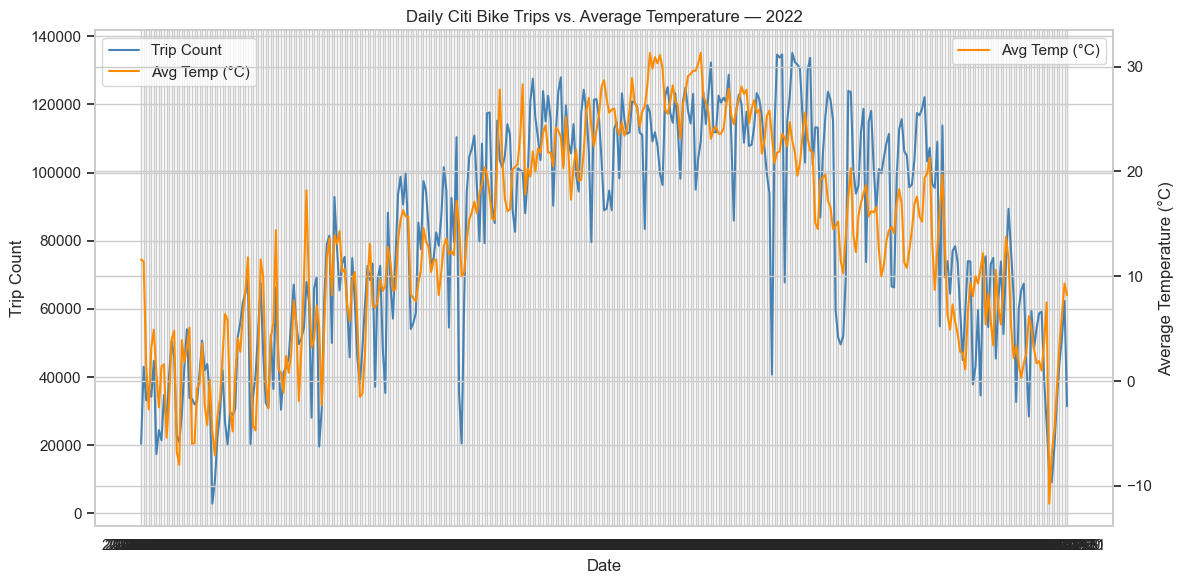

In [19]:
# Dual-axis Seaborn Plot
plt.figure(figsize=(12,6))
ax1 = plt.gca()

# Left axis: trip counts
sns.lineplot(data=df_trips_temp, x='date', y='trip_count', ax=ax1, label='Trip Count', color='steelblue')
ax1.set_ylabel('Trip Count')

ax2 = ax1.twinx()
sns.lineplot(data=df_trips_temp, x='date', y='avg_temp', ax=ax2, label='Avg Temp (°C)', color='darkorange')
ax2.set_ylabel('Average Temperature (°C)')

# Titles and formatting
ax1.set_title('Daily Citi Bike Trips vs. Average Temperature — 2022')
ax1.set_xlabel('Date')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)


plt.tight_layout()
plt.savefig('trips_vs_temp_2022.png', dpi=300, bbox_inches='tight')
plt.show()

There are so many tiny unreadable labels.The x-axis has become overcrowded because every day of 2022 was labeled.
To make the plot clearer, I will adjust the tick frequency to display one tick per month using MonthLocator() and format them as short month names.This improved readability and allowed seasonal trends to stand out while keeping the underlying daily data unchanged. And I will change my palette to viridis as I chose it in step 3

In [20]:
# Import library
import matplotlib.dates as mdates

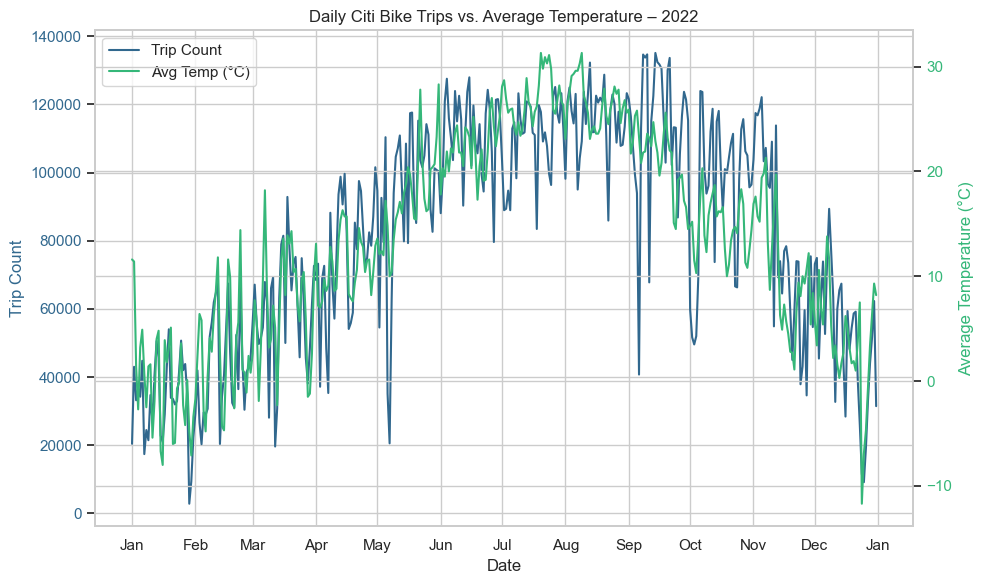

In [21]:
# Re-plot
# Dual-axis Seaborn Plot
# Select two colours from viridis
colors = sns.color_palette('viridis', 2)

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot trip counts
ax1.plot(df_trips_temp['date'], df_trips_temp['trip_count'], color=colors[0], label='Trip Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Count', color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])

# Secondary axis for temperature
ax2 = ax1.twinx()
ax2.plot(df_trips_temp['date'], df_trips_temp['avg_temp'], color=colors[1], label='Avg Temp (°C)')
ax2.set_ylabel('Average Temperature (°C)', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# Title, legend, and formatting
ax1.set_title('Daily Citi Bike Trips vs. Average Temperature – 2022')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.savefig('visualisations/trips_vs_temp_2022_viridis.png', dpi=300, bbox_inches='tight')
plt.show()



I recreated the dual-axis plot using Seaborn to show how daily trip counts vary with average temperature throughout 2022.
Trips are plotted on the left y-axis and temperature on the right. I used the same Seaborn theme for consistency and formatted the x-axis by month to make the seasonal pattern clear.
The plot shows that Citi Bike usage rises during warmer months and drops sharply during winter, indicating a strong relationship between temperature and ride volume.

### 5. Box plot 

I am creating a box plot of one categorical variable of my df_slim dataframe. I am using member_casual (user type) as my variable and want to plot it with trip durtion. However, first I need to create a 'trip duration' column as now I only have 'started_at' and 'ended_at'

In [22]:
df_slim['started_at'] = pd.to_datetime(df_slim['started_at'])
df_slim['ended_at'] = pd.to_datetime(df_slim['ended_at'])

In [23]:
# Create a trip duration column
df_slim['tripduration'] = (pd.to_datetime(df_slim['ended_at']) - 
                           pd.to_datetime(df_slim['started_at'])).dt.total_seconds() / 60


In [24]:
# Check new column
df_slim.head()

,ride_id,started_at,ended_at,start_station_name,member_casual,date,avg_temp,tripduration
0,9D0DC440CB40CF8E,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,casual,2022-08-27,27.8,6.148717
1,2214991DFBE5C4D7,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,casual,2022-08-20,27.9,8.897917
2,20C5D469563B6337,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,member,2022-08-31,25.6,8.571550
3,3E8791885BC189D1,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,member,2022-08-02,26.4,11.863550
4,8DBCBF98885106CB,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,member,2022-08-25,28.1,10.855083


In [25]:
# Check new column
df_slim[['tripduration']].describe()


,tripduration
count,2.983817e+07
mean,1.820962e+01
std,2.614485e+02
min,-5.728892e+01
25%,5.796733e+00
50%,1.016200e+01
75%,1.799900e+01
max,4.044810e+05


When first examining the summary statistics for the new tripduration column using .describe(), several data quality issues became apparent. The minimum value was negative and the maximum value exceeded 400,000 minutes (over 280 days), which is unrealistic for bike trips. These extreme values likely represent system errors, missing end times, or bikes that were never properly checked back in. Identifying these outliers confirmed that the column was calculated correctly but required filtering to remove invalid durations. This step highlighted the importance of verifying new columns with summary statistics before visualising results.

In [26]:
# Create more realistic data
df_slim = df_slim[(df_slim['tripduration'] > 0) & (df_slim['tripduration'] < 120)]


In [27]:
# Check stats again
df_slim['tripduration'].describe()


count    2.966847e+07
mean     1.401296e+01
std      1.289048e+01
min      1.488333e-01
25%      5.775267e+00
50%      1.010168e+01
75%      1.779520e+01
max      1.199996e+02
Name: tripduration, dtype: float64

After filtering unrealistic trip durations, the summary statistics now show a much more reasonable distribution. The average trip lasts around 14 minutes. The maximum duration is now capped at 120 minutes, reflecting the filter applied to remove outliers.

In [28]:
# Export with new column
df_slim.to_csv('citi_bike_slim_duration_2022.csv', index=False)


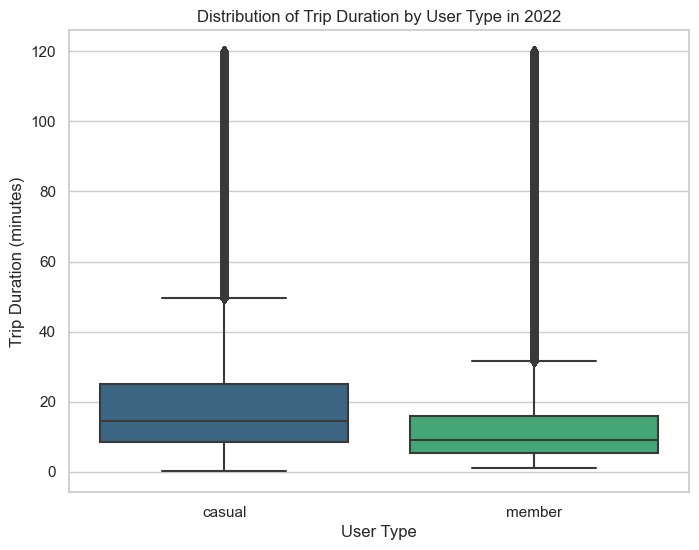

In [29]:
# Plot and save
plt.figure(figsize=(8,6))
sns.boxplot(data=df_slim, x='member_casual', y='tripduration', palette='viridis')
plt.title('Distribution of Trip Duration by User Type in 2022')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.savefig('visualisations/boxplot_tripduration_by_user.png', dpi=300)
plt.show()

#### Interpretation of box plot
In this box plot, each coloured box represents the middle 50% of all trip durations. The line inside the box marks the median trip duration, showing the midpoint of all rides for each user type. The whiskers extending from the box indicate the typical range of trip durations, while the dots beyond them represent outliers. Together, these elements provide a clear picture of how trip lengths are distributed and how they differ between casual and member users. Casual riders have a higher median trip duration, suggesting they typically use the service for longer leisure rides. Members display shorter, more consistent trip durations, reflecting regular commuting behaviour. A few outliers in both groups indicate occasional extended rides

### 6. Facetgrid

Compare monthly trip durations per user type

In [30]:
# Create a month column
df_slim['month'] = pd.to_datetime(df_slim['started_at']).dt.month_name()


In [31]:
# Check it worked
df_slim[['started_at', 'month']].head()


,started_at,month
0,2022-08-27 13:56:47.728,August
1,2022-08-20 10:37:02.756,August
2,2022-08-31 18:55:03.051,August
3,2022-08-02 08:05:00.250,August
4,2022-08-25 15:44:48.386,August


In [32]:
# Export the updated dataframe with 'tripduration' and 'month' columns
df_slim.to_csv('citi_bike_slim_duration_2022.csv', index=False)


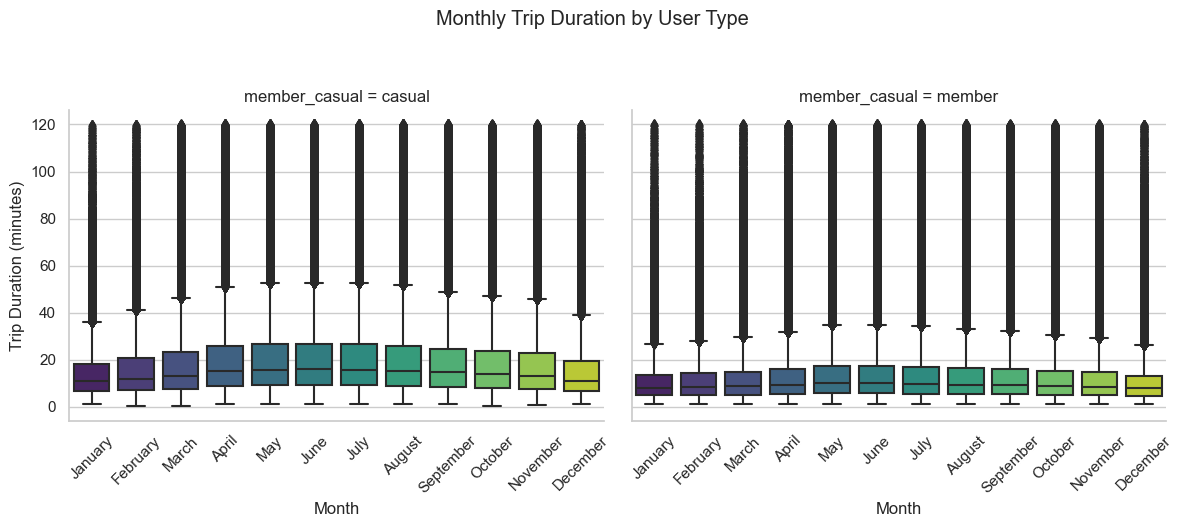

In [33]:
# Create FacetGrid
g = sns.FacetGrid(df_slim, col='member_casual', height=5, aspect=1.2)
g.map_dataframe(
    sns.boxplot,
    x='month', y='tripduration',
    order=['January','February','March','April','May','June',
           'July','August','September','October','November','December'],
    palette='viridis'
)
g.set_xticklabels(rotation=45)
g.set_axis_labels('Month', 'Trip Duration (minutes)')
g.fig.suptitle('Monthly Trip Duration by User Type', y=1.05)
plt.tight_layout()
plt.savefig('visualisations/facetgrid_tripduration_by_month_user.png', dpi=300)
plt.show()


#### Interpretation of the FacetGrid plot (Monthly trip Duration by User Type)
The FacetGrid plot compares monthly trip durations for casual and member users. Casual users show longer and more variable trip durations, especially during warmer months, indicating increased leisure or perhaps it is tourist activity in Spring and Summer. Member users maintain shorter, more consistent trip durations throughout the year, suggesting regular commuting habits independent of season.

Plotting this FacetGrid supports the goal of my project of understanding seasonal demand and user behaviour patterns. By visualising trip durations by month and user type, it becomes easier to see how weather and time of year influence casual versus member usage — insights that can help optimise bike availability, station placement, and marketing strategies throughout the year.